# Prerequisites

## Install cosmopower

To install cosmopower, visit:

https://github.com/alessiospuriomancini/cosmopower


Check cosmopower is installed:

In [1]:
import cosmopower

## Install cosmopower emulators

Make a cosmopower-organtization repository to store the emulaotors. It can be wherever on your system: <br>

$ mkdir cosmopower-organtization <br>

Then clone the emulators inside it: <br>

$ cd cosmopower-organtization <br>

$ git clone https://github.com/cosmopower-organization/lcdm.git <br>

$ git clone https://github.com/cosmopower-organization/mnu.git <br>

$ git clone https://github.com/cosmopower-organization/neff.git <br>

$ git clone https://github.com/cosmopower-organization/wcdm.git <br>

If not yet done, make sure you have cloned the repository where the tutorial notebooks are:

$ git clone https://github.com/cosmopower-organization/notebooks.git <br>

Now we need to set the path to the cosmopower-organtization repository. <br>
Mine is just one level above where we are now, so: (adapt to your needs!)

In [2]:
import os
root_path = os.path.abspath("")
path_to_cosmopower_organization = root_path + '/../../cosmopower-organization/' 

Check that these paths are correctly set:

(This should return the list of subdirectory in each repo: PK/PP/TTTEEE/etc)

In [3]:
import subprocess
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('inside lcdm:')
print(subprocess.call(str_cmd_subprocess))

path_to_emulators = path_to_cosmopower_organization + 'mnu/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('\ninside mnu:')
subprocess.call(str_cmd_subprocess)

path_to_emulators = path_to_cosmopower_organization + 'wcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('\ninside wcdm:')
subprocess.call(str_cmd_subprocess)

path_to_emulators = path_to_cosmopower_organization + 'neff/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('\ninside neff:')
subprocess.call(str_cmd_subprocess)

inside lcdm:
0

inside mnu:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances

inside wcdm:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances

inside neff:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances


0

# Initialize

In [4]:
import numpy as np
import scipy

from cosmopower import cosmopower_NN
from cosmopower import cosmopower_PCAplusNN

#
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

In [5]:

derived_params_names = ['100*theta_s',  
                        'sigma8',
                        'YHe',
                        'z_reio',
                        'Neff',
                        'tau_rec',
                        'z_rec',
                        'rs_rec',
                        'ra_rec',
                        'tau_star',
                        'z_star',
                        'rs_star',
                        'ra_star',
                        'rs_drag'] 


emulator_dict = {}
emulator_dict['lcdm'] = {}
emulator_dict['mnu'] = {}
emulator_dict['neff'] = {}
emulator_dict['wcdm'] = {}




emulator_dict['lcdm']['TT'] = 'TT_v1'
emulator_dict['lcdm']['TE'] = 'TE_v1'
emulator_dict['lcdm']['EE'] = 'EE_v1'
emulator_dict['lcdm']['PP'] = 'PP_v1'
emulator_dict['lcdm']['PKNL'] = 'PKNL_v1'
emulator_dict['lcdm']['PKL'] = 'PKL_v1'
emulator_dict['lcdm']['DER'] = 'DER_v1'
emulator_dict['lcdm']['DAZ'] = 'DAZ_v1'
emulator_dict['lcdm']['HZ'] = 'HZ_v1'
emulator_dict['lcdm']['S8Z'] = 'S8Z_v1'

emulator_dict['mnu']['TT'] = 'TT_mnu_v1'
emulator_dict['mnu']['TE'] = 'TE_mnu_v1'
emulator_dict['mnu']['EE'] = 'EE_mnu_v1'
emulator_dict['mnu']['PP'] = 'PP_mnu_v1'  
emulator_dict['mnu']['PKNL'] = 'PKNL_mnu_v1'  
emulator_dict['mnu']['PKL'] = 'PKL_mnu_v1'  
emulator_dict['mnu']['DER'] = 'DER_mnu_v1' 
emulator_dict['mnu']['DAZ'] = 'DAZ_mnu_v1'  
emulator_dict['mnu']['HZ'] = 'HZ_mnu_v1'  
emulator_dict['mnu']['S8Z'] = 'S8Z_mnu_v1'  


emulator_dict['neff']['TT'] = 'TT_neff_v1'
emulator_dict['neff']['TE'] = 'TE_neff_v1'
emulator_dict['neff']['EE'] = 'EE_neff_v1'
emulator_dict['neff']['PP'] = 'PP_neff_v1'  
emulator_dict['neff']['PKNL'] = 'PKNL_neff_v1'  
emulator_dict['neff']['PKL'] = 'PKL_neff_v1'  
emulator_dict['neff']['DER'] = 'DER_neff_v1'
emulator_dict['neff']['DAZ'] = 'DAZ_neff_v1'
emulator_dict['neff']['HZ'] = 'HZ_neff_v1'
emulator_dict['neff']['S8Z'] = 'S8Z_neff_v1'



emulator_dict['wcdm']['TT'] = 'TT_w_v1'
emulator_dict['wcdm']['TE'] = 'TE_w_v1'
emulator_dict['wcdm']['EE'] = 'EE_w_v1'
emulator_dict['wcdm']['PP'] = 'PP_w_v1'  
emulator_dict['wcdm']['PKNL'] = 'PKNL_w_v1'  
emulator_dict['wcdm']['PKL'] = 'PKL_w_v1'  
emulator_dict['wcdm']['DER'] = 'DER_w_v1'
emulator_dict['wcdm']['DAZ'] = 'DAZ_w_v1'
emulator_dict['wcdm']['HZ'] = 'HZ_w_v1'
emulator_dict['wcdm']['S8Z'] = 'S8Z_w_v1'



Load the emulators:

(This should return no error)

In [6]:
%%time
cp_tt_nn = {}
cp_te_nn = {}
cp_ee_nn = {}
cp_pp_nn = {}
cp_pknl_nn = {}
cp_pkl_nn = {}
cp_der_nn = {}
cp_da_nn = {}
cp_h_nn = {}
cp_s8_nn = {}

for mp in ['lcdm','mnu','neff','wcdm']:
    path_to_emulators = path_to_cosmopower_organization + mp +'/'
    
    cp_tt_nn[mp] = cosmopower_NN(restore=True,
                             restore_filename=path_to_emulators + 'TTTEEE/' + emulator_dict[mp]['TT'])

    cp_te_nn[mp] = cosmopower_PCAplusNN(restore=True, 
                                    restore_filename=path_to_emulators + 'TTTEEE/' + emulator_dict[mp]['TE'])

    cp_ee_nn[mp] = cosmopower_NN(restore=True,
                             restore_filename=path_to_emulators + 'TTTEEE/' + emulator_dict[mp]['EE'])

    cp_pp_nn[mp] = cosmopower_NN(restore=True,
                             restore_filename=path_to_emulators + 'PP/' + emulator_dict[mp]['PP'])

    cp_pknl_nn[mp] = cosmopower_NN(restore=True,
                               restore_filename=path_to_emulators + 'PK/' + emulator_dict[mp]['PKNL'])

    cp_pkl_nn[mp] = cosmopower_NN(restore=True,
                              restore_filename=path_to_emulators + 'PK/' + emulator_dict[mp]['PKL'])

    cp_der_nn[mp] = cosmopower_NN(restore=True,
                              restore_filename=path_to_emulators + 'derived-parameters/' + emulator_dict[mp]['DER'])

    cp_da_nn[mp] = cosmopower_NN(restore=True,
                             restore_filename=path_to_emulators + 'growth-and-distances/' + emulator_dict[mp]['DAZ'])   

    cp_h_nn[mp] = cosmopower_NN(restore=True,
                            restore_filename=path_to_emulators + 'growth-and-distances/' + emulator_dict[mp]['HZ'])   

    cp_s8_nn[mp] = cosmopower_NN(restore=True,
                             restore_filename=path_to_emulators + 'growth-and-distances/' + emulator_dict[mp]['S8Z'])   


Metal device set to: Apple M1 Pro


2023-01-24 21:14:54.453515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-24 21:14:54.454095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


CPU times: user 488 ms, sys: 404 ms, total: 892 ms
Wall time: 1.09 s


# Computing with cosmopower

In [7]:
params_settings = {# LambdaCDM parameters
                   # last column of Table 1 of https://arxiv.org/pdf/1807.06209.pdf:
                   'H0': 67.37,
                   'omega_b':0.02233,
                   'omega_cdm': 0.1198,
                   'ln10^{10}A_s':3.043,
                   'tau_reio': 0.0540,
                   'n_s': 0.9652,
                   }  

l_max_scalars = 11000

## CMB temperature and polarization

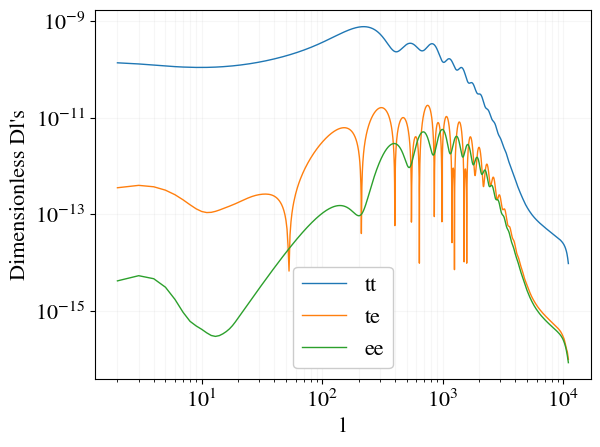

In [9]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    

predicted_tt_spectrum = cp_tt_nn[mp].ten_to_predictions_np(params_cp)
predicted_te_spectrum = cp_te_nn[mp].predictions_np(params_cp)
predicted_ee_spectrum = cp_ee_nn[mp].ten_to_predictions_np(params_cp)



l = np.arange(2,l_max_scalars+1)
plt.plot(l,predicted_tt_spectrum[0],ls='-',lw=1.,label='tt')
plt.plot(l,np.abs(predicted_te_spectrum[0]),ls='-',lw=1.,label='te')
plt.plot(l,predicted_ee_spectrum[0],ls='-',lw=1.,label='ee')

plt.legend(framealpha=1)
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Dimensionless Dl\'s')
plt.xlabel('l')
plt.grid(which='both',alpha=0.1)
# plt.ylim(1e-14,1e-9)

## CMB lensing

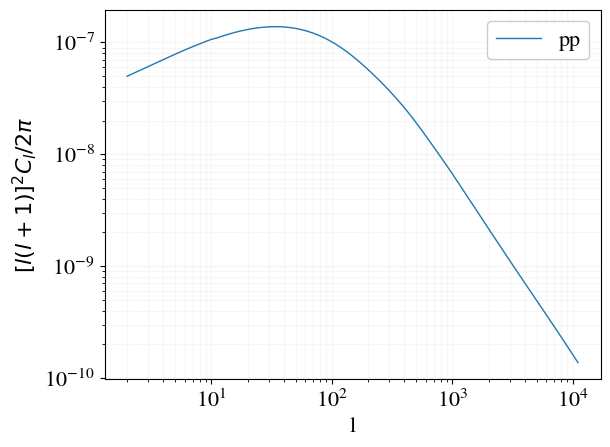

In [11]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    
predicted_pp_spectrum = cp_pp_nn[mp].ten_to_predictions_np(params_cp)



l = np.arange(2,l_max_scalars+1)
plt.plot(l,predicted_pp_spectrum[0]/2./np.pi,ls='-',lw=1.,label='pp')

plt.legend(framealpha=1)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$[l(l+1)]^2 C_l /2\pi$')
plt.xlabel('l')
plt.grid(which='both',alpha=0.1)
# plt.ylim(1e-14,1e-9)

## Linear P(k)

In [12]:
mp = 'lcdm'
predicted_pkl_spectrum = {}
params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]
params_cp_pk = params_cp.copy()
for zpk in [0,2.5,5]:
    params_cp_pk['z_pk_save_nonclass'] = [zpk]
    predicted_pkl_spectrum[str(zpk)] = cp_pkl_nn[mp].predictions_np(params_cp_pk)

Text(0.5, 0, '$k$  [1/Mpc]')

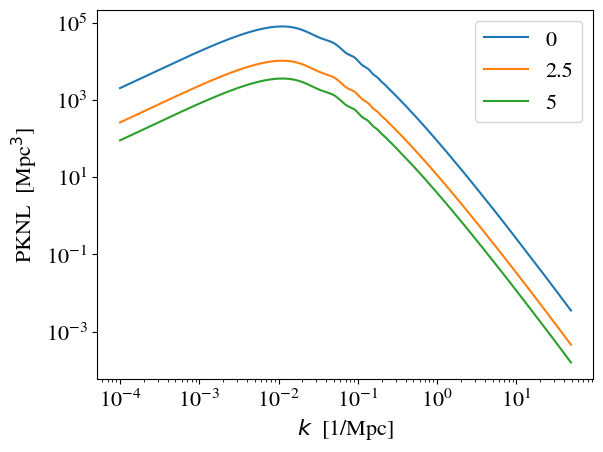

In [13]:


izpk = 0
ndspl = 10
k_arr = np.geomspace(1e-4,50.,5000)[::ndspl]
ls = np.arange(2,5000+2)[::ndspl]
dls = ls*(ls+1.)/2./np.pi
for zpk in [0,2.5,5]:
    pkl = 10.**np.asarray(predicted_pkl_spectrum[str(zpk)][0])
    pkl_re =  ((dls)**-1*pkl)
    plt.plot(k_arr,pkl_re,label=zpk)
    izpk +=1 
plt.loglog()
plt.legend()
plt.ylabel(r'PKNL  [Mpc$^3$]')
plt.xlabel(r'$k$  [1/Mpc]')

## Non-Linear P(k)

In [14]:
mp = 'lcdm'
predicted_pknl_spectrum = {}
params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]
params_cp_pk = params_cp.copy()
for zpk in [0,2.5,5]:
    params_cp_pk['z_pk_save_nonclass'] = [zpk]
    predicted_pknl_spectrum[str(zpk)] = cp_pknl_nn[mp].predictions_np(params_cp_pk)

Text(0.5, 0, '$k$  [1/Mpc]')

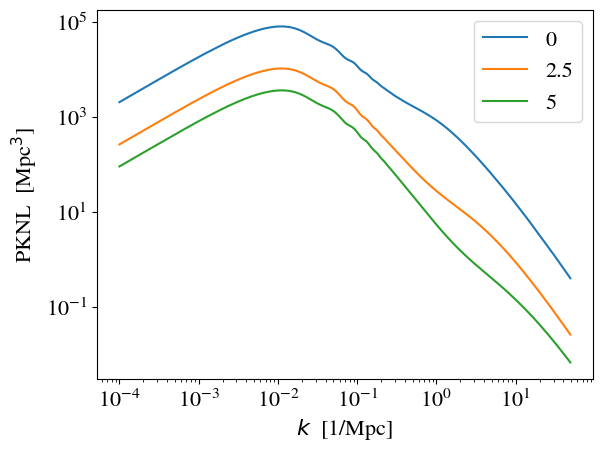

In [15]:


izpk = 0
ndspl = 10
k_arr = np.geomspace(1e-4,50.,5000)[::ndspl]
ls = np.arange(2,5000+2)[::ndspl]
dls = ls*(ls+1.)/2./np.pi
for zpk in [0,2.5,5]:
    pkl = 10.**np.asarray(predicted_pknl_spectrum[str(zpk)][0])
    pkl_re =  ((dls)**-1*pkl)
    plt.plot(k_arr,pkl_re,label=zpk)
    izpk +=1 
plt.loglog()
plt.legend()
plt.ylabel(r'PKNL  [Mpc$^3$]')
plt.xlabel(r'$k$  [1/Mpc]')

## H(z)

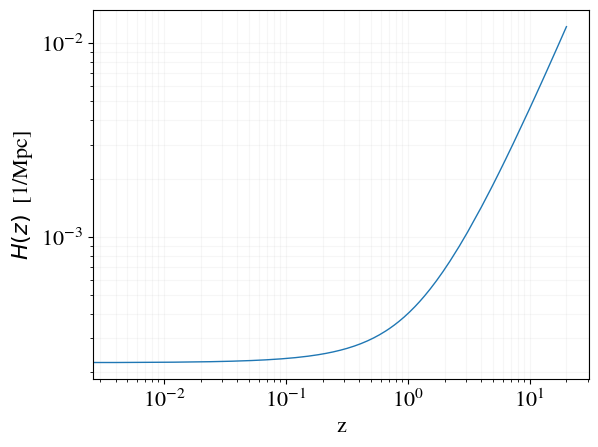

In [16]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    
predicted_hz = cp_h_nn[mp].ten_to_predictions_np(params_cp)


nz = 5000 # number of z-points in redshift data 
zmax = 20. # max redshift of redshift data 
z_arr = np.linspace(0.,zmax,nz)


plt.plot(z_arr,predicted_hz[0],ls='-',lw=1.)


plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$H(z)$  [1/Mpc]')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)
# plt.ylim(1e-14,1e-9)

## DA(z)

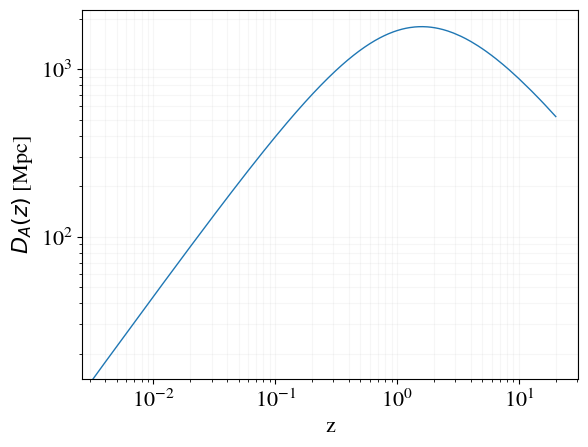

In [17]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    
predicted_daz = cp_da_nn[mp].predictions_np(params_cp)


nz = 5000 # number of z-points in redshift data 
zmax = 20. # max redshift of redshift data 
z_arr = np.linspace(0.,zmax,nz)


plt.plot(z_arr,predicted_daz[0],ls='-',lw=1.)


plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$D_A(z)$ [Mpc]')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)


## $\sigma_8$(z)

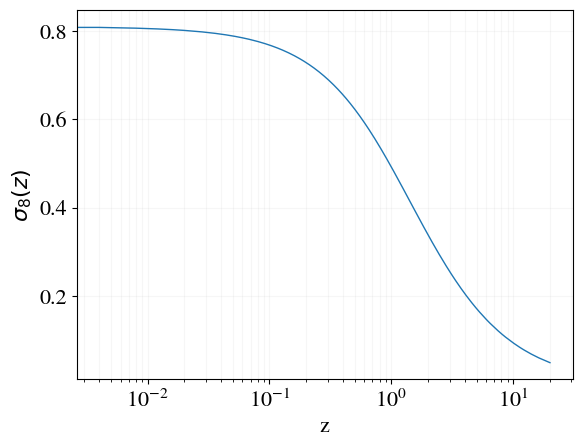

In [8]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    
predicted_s8z = cp_s8_nn[mp].predictions_np(params_cp)


nz = 5000 # number of z-points in redshift data 
zmax = 20. # max redshift of redshift data 
z_arr = np.linspace(0.,zmax,nz)


plt.plot(z_arr,predicted_s8z[0],ls='-',lw=1.)


plt.xscale('log')

plt.ylabel(r'$\sigma_8(z)$')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)


# Derived quantities

## f $\sigma_8$, f and D


To get f $\sigma_8$ we follow classy

In [28]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]
predicted_s8z = cp_s8_nn[mp].predictions_np(params_cp)


nz = 5000 # number of z-points in redshift data 
zmax = 20. # max redshift of redshift data 
z_arr = np.linspace(0.,zmax,nz)
s8z_interp = scipy.interpolate.interp1d(
                                z_arr,
                                predicted_s8z[0],
                                kind='linear',
                                axis=-1,
                                copy=True,
                                bounds_error=False,
                                fill_value=np.nan,
                                assume_sorted=False)


def effective_f_sigma8(z):
    """
    effective_f_sigma8(z)

    Returns the time derivative of sigma8(z) computed as (d sigma8/d ln a)

    Parameters
    ----------
    z : float
            Desired redshift
    z_step : float
            Default step used for the numerical two-sided derivative. For z < z_step the step is reduced progressively down to z_step/10 while sticking to a double-sided derivative. For z< z_step/10 a single-sided derivative is used instead.

    Returns
    -------
    (d ln sigma8/d ln a)(z) (dimensionless)
    """
    # we need d sigma8/d ln a = - (d sigma8/dz)*(1+z)

    # if possible, use two-sided derivative with default value of z_step
    z_step=0.1
    if z >= z_step:
        result = (s8z_interp(z-z_step)-s8z_interp(z+z_step))/(2.*z_step)*(1+z)
    else:
        # if z is between z_step/10 and z_step, reduce z_step to z, and then stick to two-sided derivative
        if (z > z_step/10.):
            z_step = z
            result = (s8z_interp(z-z_step)-s8z_interp(z+z_step))/(2.*z_step)*(1+z)
        else:
            z_step /=10
            result = (s8z_interp(z)-s8z_interp(z+z_step))/z_step*(1+z)
    return result



def scale_independent_growth_factor_f(z):
    return effective_f_sigma8(z)/s8z_interp(z)

def scale_independent_growth_factor(z):
    return s8z_interp(z)/s8z_interp(0.)

effective_f_sigma8 = np.vectorize(effective_f_sigma8)
scale_independent_growth_factor_f = np.vectorize(scale_independent_growth_factor_f)
scale_independent_growth_factor = np.vectorize(scale_independent_growth_factor)


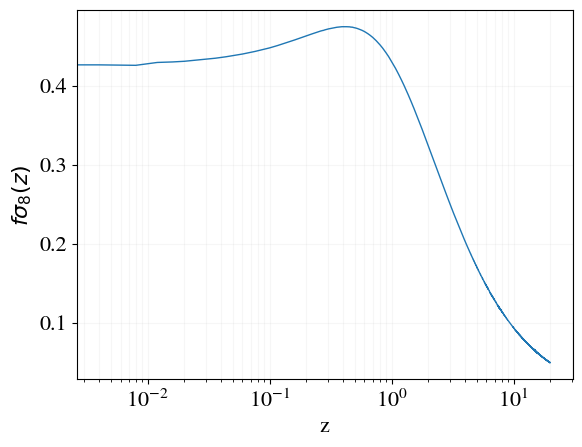

In [29]:
plt.plot(z_arr,effective_f_sigma8(z_arr),ls='-',lw=1.)


plt.xscale('log')

plt.ylabel(r'$f\sigma_8(z)$')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)

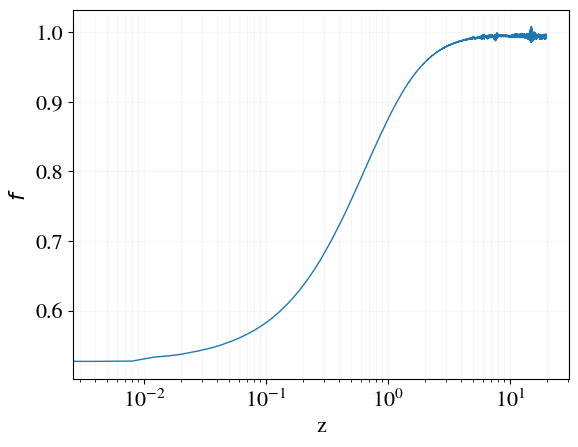

In [30]:
plt.plot(z_arr,scale_independent_growth_factor_f(z_arr),ls='-',lw=1.)


plt.xscale('log')

plt.ylabel(r'$f$')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)

(Numerical noise above is after z=4 and is not important for current applications)

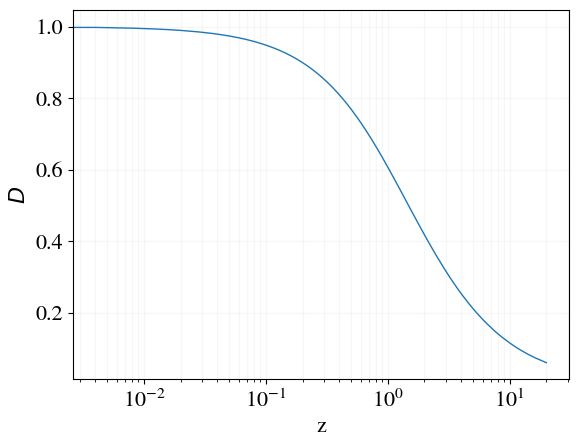

In [31]:
plt.plot(z_arr,scale_independent_growth_factor(z_arr),ls='-',lw=1.)


plt.xscale('log')

plt.ylabel(r'$D$')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)

# Chi

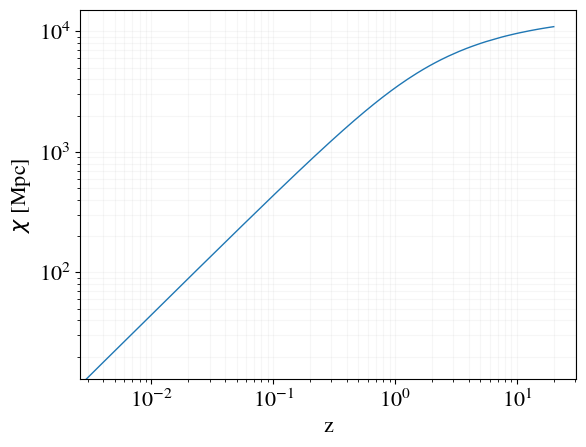

In [37]:
mp = 'lcdm'

params_cp = {}
for key,value in params_settings.items():
    params_cp[key] = [value]

    
predicted_daz = cp_da_nn[mp].predictions_np(params_cp)


nz = 5000 # number of z-points in redshift data 
zmax = 20. # max redshift of redshift data 
z_arr = np.linspace(0.,zmax,nz)


plt.plot(z_arr,predicted_daz[0]*(1.+z_arr),ls='-',lw=1.)


plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$\chi$ [Mpc]')
plt.xlabel('z')
plt.grid(which='both',alpha=0.1)

In [35]:
predicted_daz[0]*(1.+z_arr)

array([    0.        ,    17.78822419,    35.54216825, ...,
       10956.9317198 , 10957.25814565, 10957.57817624])

In [56]:
test_arr = np.array([    0.    ,    17.78822419,    35.54216825, 67.3, 73.1, 71.2, 75.6, 89., 100., 98., 200., 400.])

test_arr_p = test_arr[1:]
test_arr_m = test_arr[:-1]

np.where((test_arr_p-test_arr_m)<0)

test_arr_sorted = np.delete(test_arr, np.where((test_arr_p-test_arr_m)<0))

test_arr_sorted

array([  0.        ,  17.78822419,  35.54216825,  67.3       ,
        71.2       ,  75.6       ,  89.        ,  98.        ,
       200.        , 400.        ])